### Load tensorflow

In [0]:
import tensorflow as tf
from sklearn.preprocessing import scale
import numpy as np

In [0]:
#Reset Default graph - Needed only for Jupyter notebook
tf.reset_default_graph()

In [20]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [21]:
!ls /content/gdrive/My\ Drive/Colab\ Notebooks/prices.csv

'/content/gdrive/My Drive/Colab Notebooks/prices.csv'


### Collect Data

In [0]:
import pandas as pd

In [0]:
data = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/prices.csv')

### Check all columns in the dataset

In [24]:
data.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [25]:
data.shape

(851264, 7)

### Drop columns `date` and  `symbol`

In [0]:
data.drop(['date', 'symbol'], inplace = True, axis = 1)

In [27]:
data.head()

,open,close,low,high,volume
0,123.430000,125.839996,122.309998,126.250000,2163600.0
1,125.239998,119.980003,119.940002,125.540001,2386400.0
2,116.379997,114.949997,114.930000,119.739998,2489500.0
3,115.480003,116.620003,113.500000,117.440002,2006300.0
4,117.010002,114.970001,114.089996,117.330002,1408600.0


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 5 columns):
open      851264 non-null float64
close     851264 non-null float64
low       851264 non-null float64
high      851264 non-null float64
volume    851264 non-null float64
dtypes: float64(5)
memory usage: 32.5 MB


In [29]:
data.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,70.836986,70.857109,70.118414,71.543476,5.415113e+06
std,83.695876,83.689686,82.877294,84.465504,1.249468e+07
min,0.850000,0.860000,0.830000,0.880000,0.000000e+00
25%,33.840000,33.849998,33.480000,34.189999,1.221500e+06
50%,52.770000,52.799999,52.230000,53.310001,2.476250e+06
75%,79.879997,79.889999,79.110001,80.610001,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


### Consider only first 1000 rows in the dataset for building feature set and target set

In [0]:
data = data.head(1000)

In [31]:
data.shape

(1000, 5)

In [0]:
X = data.loc[:, data.columns != 'close']
Y = data.loc[:, data.columns == 'close']

### Divide the data into train and test sets

In [0]:
X_train = scale(X[:700])
y_train = np.array(Y[:700])

In [0]:
X_test = scale(X[:300])
y_test = np.array(Y[:300])

In [35]:
print("X_Train: {}, y_train: {}".format(X_train.shape, y_train.shape))

X_Train: (700, 4), y_train: (700, 1)


## Building the graph in tensorflow

In [0]:
import numpy as np

1.Define input data placeholders

In [0]:
x = tf.placeholder(shape = [None, 4], name ='x-input', dtype = tf.float64)

y = tf.placeholder(shape = [None, 1],  name = 'y-input', dtype = tf.float64)


2.Define Weights and Bias

In [38]:
# Set model weights - with random initialization
W = tf.Variable(tf.truncated_normal([4, 1], 
                                    mean=0.0, 
                                    stddev=1.0, 
                                    dtype=tf.float64), 
                name="weight") 
# Set model biais - initialized to 0
b = tf.Variable(tf.zeros(1, dtype = tf.float64), name="bias") 

Instructions for updating:
Colocations handled automatically by placer.


3.Prediction

In [0]:
def linear_reg(x,y):
    Ypred = tf.add(b,tf.matmul(x,W))
    error = (loss_func(y, Ypred))
    return([Ypred,error])

y, cost = linear_reg(X_train, y_train)  

4.Loss (Cost) Function [Mean square error]

In [0]:
def loss_func(y, y_pred):
  return tf.reduce_mean(tf.square(y - y_pred))

5.GradientDescent Optimizer to minimize Loss [GradientDescentOptimizer]

In [0]:
grad_desc = tf.train.GradientDescentOptimizer(learning_rate = 0.01).minimize(cost)

## Execute the Graph for 100 epochs and observe the loss

In [0]:
epochs = 100
cost_history = [[], []]

In [0]:
# Initialize the variables
init = tf.global_variables_initializer()

In [46]:
with tf.Session() as sess:
    sess.run(init)
    for i in list(range(epochs)):
        sess.run(grad_desc)
        
        # For each 10 epochs, save costs values - we can plot it later  
        if i % 10 == 0.: 
            cost_history[0].append(i+1) 
            cost_history[1].append(sess.run(cost)) 
        if i == 99: 
            print("Cost = ", sess.run(cost)) 
    
    train_cost = linear_reg(X_train, y_train)[1]
    print('Train error =', sess.run(train_cost))
    valid_cost = linear_reg(X_test, y_test)[1]
    print('Validation error =', sess.run(valid_cost))

('Cost = ', 97.31113114303406)
('Train error =', 97.31113114303406)
('Validation error =', 2560.5175201335705)


In [0]:
sess.close()

### Get the shapes and values of W and b

Hint: Use sess.run(W) to get W.

In [0]:
import matplotlib.pyplot as plt

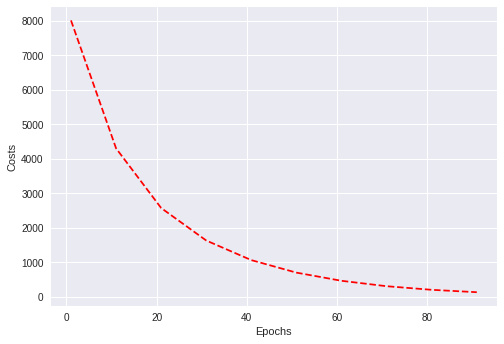

In [49]:
# Plot costs values
    plt.plot(cost_history[0], cost_history[1], 'r--')
    plt.ylabel('Costs')
    plt.xlabel('Epochs')
    plt.show()

In [50]:
with tf.Session() as sess_w:
    sess_w.run(W.initializer)
    print("Shape of W: ", W.shape)
    print("Values of W: ", W.eval())

sess_w.close()

('Shape of W: ', TensorShape([Dimension(4), Dimension(1)]))
('Values of W: ', array([[-1.3420942 ],
       [ 1.70996841],
       [-0.25312629],
       [-1.10651135]]))


In [51]:
with tf.Session() as sess_b:
    sess_b.run(b.initializer)
    print("Shape of b: ", b.shape)
    print("Values of b: ", b.eval())

sess_b.close()

('Shape of b: ', TensorShape([Dimension(1)]))
('Values of b: ', array([0.]))


In [52]:
b.shape


TensorShape([Dimension(1)])

### Find the Absolute mean square loss difference between training and testing loss.

In [0]:
difference = tf.Variable(np.abs(train_cost - valid_cost))

In [54]:
with tf.Session() as sess_d:
  sess_d.run(difference.initializer)
  print("Mean Square Loss Difference: ", difference.eval())

('Mean Square Loss Difference: ', 4482.486985726222)


In [0]:
sess_d.close()

### Linear Classification using Keras

### Building the simple Neural Network in Keras with one neuron in the dense hidden layer.
#### Use Mean square error as loss function and sgd as optimizer

In [0]:
t_model = tf.keras.Sequential()
t_model.add(tf.keras.layers.Dense(1))
t_model.compile(loss = tf.losses.mean_squared_error, optimizer = tf.keras.optimizers.SGD())

### Execute the model

In [57]:
t_model.fit(X_train, y_train, batch_size=32, epochs=100)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
700/700 [==============================] - 0s 166us/sample - loss: 4873.2935
Epoch 2/100
700/700 [==============================] - 0s 33us/sample - loss: 1602.9221
Epoch 3/100
700/700 [==============================] - 0s 31us/sample - loss: 633.6384
Epoch 4/100
700/700 [==============================] - 0s 32us/sample - loss: 259.3566
Epoch 5/100
700/700 [==============================] - 0s 31us/sample - loss: 106.9190
Epoch 6/100
700/700 [==============================] - 0s 32us/sample - loss: 44.1350
Epoch 7/100
700/700 [==============================] - 0s 32us/sample - loss: 18.4040
Epoch 8/100
700/700 [==============================] - 0s 34us/sample - loss: 7.8428
Epoch 9/100
700/700 [==============================] - 0s 31us/sample - loss: 3.5130
Epoch 10/100
700/700 [==============================] - 0s 29us/sample - loss: 1.7400
Epoch 11/100
700/700 [==============================] - 0s 28us/sample - loss: 1.0083


### Classification using Keras 

### Load the given Iris data using pandas (Iris.csv)

In [0]:
c_data = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/Iris-1.csv")

### Splitting the data into feature set and target set

In [59]:
c_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [0]:
X_i = c_data.loc[:, c_data.columns != 'Species']
Y_i = c_data.loc[:, c_data.columns == 'Species']

### Target set has different categories. So, Label encode them. And convert into one-hot vectors using get_dummies in pandas.

In [61]:
Y_i.head()

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [62]:
np.unique(Y_i)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [63]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(Y_i)
encoded_Y_i = encoder.transform(Y_i)
Y_i = pd.get_dummies(encoded_Y_i)

/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
Y_i.columns = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [65]:
Y_i.head()

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


### Divide the dataset into Training and test (70:30)

In [66]:
#Dropping ID Column from feature set
X_i.drop('Id', inplace = True, axis = 1)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
from sklearn.model_selection import train_test_split
X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(X_i, Y_i, random_state = 42, test_size = 0.3)

In [68]:
print("X_train, y_train, X_test, y_test Shapes: ", X_train_i.shape, y_train_i.shape, X_test_i.shape, y_test_i.shape)

('X_train, y_train, X_test, y_test Shapes: ', (105, 4), (105, 3), (45, 4), (45, 3))


### Model
Build the model with following layers: <br>
1. First dense layer with 10 neurons with input shape 4 (according to the feature set) <br>
2. Second Dense layer with 8 neurons <br>
3. Output layer with 3 neurons with softmax activation (output layer, 3 neurons as we have 3 classes) <br>
4. Use SGD and categorical_crossentropy loss 

In [0]:
sgd_model = tf.keras.models.Sequential()
sgd_model.add(tf.keras.layers.BatchNormalization())
sgd_model.add(tf.keras.layers.Dense(10, input_shape = (4, )))
sgd_model.add(tf.keras.layers.Dense(8))
sgd_model.add(tf.keras.layers.Dense(3, activation='softmax'))

In [0]:
sgd_optimizer = tf.keras.optimizers.SGD(lr = 0.01)

In [0]:
sgd_model.compile(loss='categorical_crossentropy', optimizer= sgd_optimizer, metrics=['accuracy'])

### Fitting the model and predicting 

In [0]:
X_train_i = np.array(X_train_i)
y_train_i = np.array(y_train_i)
X_test_i = np.array(X_test_i)
y_test_i = np.array(y_test_i)

In [86]:
sgd_model.fit(X_train_i, y_train_i, epochs = 100)

Epoch 1/100
105/105 [==============================] - 0s 82us/sample - loss: 0.1721 - acc: 0.9238
Epoch 2/100
105/105 [==============================] - 0s 72us/sample - loss: 0.2771 - acc: 0.8857
Epoch 3/100
105/105 [==============================] - 0s 77us/sample - loss: 0.2278 - acc: 0.9143
Epoch 4/100
105/105 [==============================] - 0s 73us/sample - loss: 0.2063 - acc: 0.9143
Epoch 5/100
105/105 [==============================] - 0s 77us/sample - loss: 0.2143 - acc: 0.8952
Epoch 6/100
105/105 [==============================] - 0s 103us/sample - loss: 0.1682 - acc: 0.9429
Epoch 7/100
105/105 [==============================] - 0s 92us/sample - loss: 0.1684 - acc: 0.9429
Epoch 8/100
105/105 [==============================] - 0s 99us/sample - loss: 0.1628 - acc: 0.9524
Epoch 9/100
105/105 [==============================] - 0s 95us/sample - loss: 0.1755 - acc: 0.9333
Epoch 10/100
105/105 [==============================] - 0s 107us/sample - loss: 0.1938 - acc: 0.9333
Epoch 1

In [0]:
#Let us try with the Adam optimizer
adam_model = tf.keras.models.Sequential()
adam_model.add(tf.keras.layers.BatchNormalization())
adam_model.add(tf.keras.layers.Dense(10, input_shape = (4, )))
adam_model.add(tf.keras.layers.Dense(8))
adam_model.add(tf.keras.layers.Dense(3, activation='softmax'))

adam_model.compile(loss='categorical_crossentropy', optimizer= 'adam', metrics=['accuracy'])

In [88]:
adam_model.fit(X_train_i, y_train_i, epochs = 100)

Epoch 1/100
105/105 [==============================] - 0s 2ms/sample - loss: 1.6193 - acc: 0.0667
Epoch 2/100
105/105 [==============================] - 0s 121us/sample - loss: 1.5375 - acc: 0.0762
Epoch 3/100
105/105 [==============================] - 0s 124us/sample - loss: 1.4502 - acc: 0.1143
Epoch 4/100
105/105 [==============================] - 0s 103us/sample - loss: 1.4004 - acc: 0.2286
Epoch 5/100
105/105 [==============================] - 0s 98us/sample - loss: 1.3336 - acc: 0.2667
Epoch 6/100
105/105 [==============================] - 0s 113us/sample - loss: 1.2710 - acc: 0.2667
Epoch 7/100
105/105 [==============================] - 0s 94us/sample - loss: 1.2153 - acc: 0.2667
Epoch 8/100
105/105 [==============================] - 0s 91us/sample - loss: 1.1565 - acc: 0.2762
Epoch 9/100
105/105 [==============================] - 0s 99us/sample - loss: 1.1063 - acc: 0.3048
Epoch 10/100
105/105 [==============================] - 0s 90us/sample - loss: 1.0648 - acc: 0.3905
Epoch 

### Report Accuracy of the predicted values

In [89]:
#Accuracy of SGD Model
sgd_model.evaluate(X_test_i, y_test_i)

45/45 [==============================] - 0s 149us/sample - loss: 0.0761 - acc: 1.0000


[0.07612671918339199, 1.0]

In [90]:
#Accuracy of Adam Model
adam_model.evaluate(X_test_i, y_test_i)

45/45 [==============================] - 0s 2ms/sample - loss: 0.2372 - acc: 0.9111


[0.23718103567759197, 0.9111111]